In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [3]:
def display(array1, array2):
    n = 8

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [4]:
def make_some_noise(array):

    noise_factor = 0.35
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

In [5]:
def preprocess_dataset(array):

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


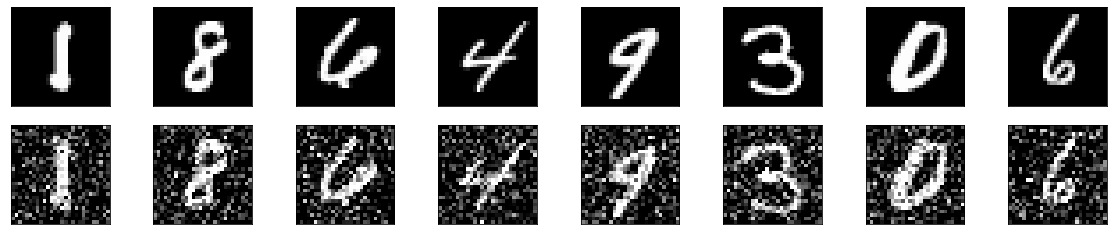

In [6]:
# We only use images in this tutorial, so no need to load the labels
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess_dataset(train_data)
test_data = preprocess_dataset(test_data)

# Create "noised" data
noisy_train_data = make_some_noise(train_data)
noisy_test_data = make_some_noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [7]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
model = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
model = layers.MaxPooling2D((2, 2), padding="same")(model)
model = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(model)
model = layers.MaxPooling2D((2, 2), padding="same")(model)

# Decoder
model = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(model)
model = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(model)
model = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(model)
       
          
# Autoencoder
ae = Model(input, model)
ae.compile(optimizer="adam", loss="binary_crossentropy")
ae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [8]:
tensorflow.keras.utils.plot_model(
    ae,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
ae.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 84s 177ms/step - loss: 0.1712 - val_loss: 0.0987
Epoch 2/100
469/469 [==============================] - 79s 169ms/step - loss: 0.0956 - val_loss: 0.0918
Epoch 3/100
469/469 [==============================] - 74s 157ms/step - loss: 0.0913 - val_loss: 0.0890
Epoch 4/100
469/469 [==============================] - 74s 157ms/step - loss: 0.0890 - val_loss: 0.0876
Epoch 5/100
469/469 [==============================] - 71s 152ms/step - loss: 0.0877 - val_loss: 0.0865
Epoch 6/100
469/469 [==============================] - 74s 158ms/step - loss: 0.0867 - val_loss: 0.0858
Epoch 7/100
469/469 [==============================] - 85s 181ms/step - loss: 0.0859 - val_loss: 0.0849
Epoch 8/100
469/469 [==============================] - 84s 179ms/step - loss: 0.0853 - val_loss: 0.0843
Epoch 9/100
469/469 [==============================] - 81s 173ms/step - loss: 0.0847 - val_loss: 0.0839
Epoch 10/100
469/469 [==============================] - 80s 170m

313/313 [==============================] - 4s 11ms/step


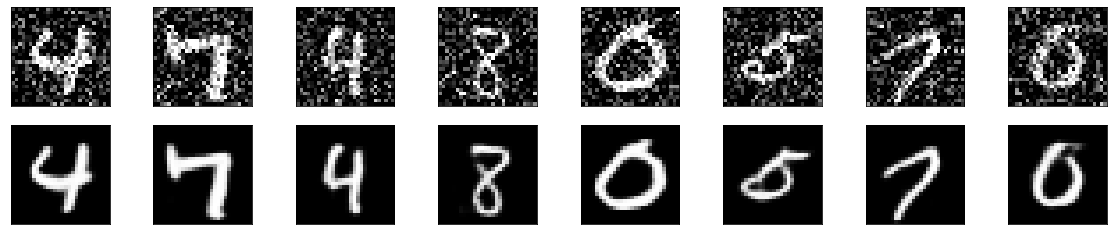

In [10]:
predictions = ae.predict(noisy_test_data)
display(noisy_test_data, predictions)